Use pandas and numpy to efficiently read and manipulate all the cell towers data.

In [43]:
import pandas as pd
import numpy as np


Simplifying the problem to a 1-dimensional plane (with Easting on the x-axis), we could easily and effectively solve this problem by just arranging the cell tower in either ascending or descending order

Each tower will be given the frequency of (index % 6 + 105). This results in each tower having a frequency between 105(inclusive) and 110(inclusive)

With this we dont need to calculate the distance between all possible pairs which would be O(n2) in time.
We just need to iterate through the list once which is O(n) in time.

In [47]:
data = pd.read_csv('cell_towers.csv')
data = data.sort_values(by=['Easting'])

frequencies = np.arange(0, len(data))

frequencies = frequencies % 6 + 105

data['Frequency'] = frequencies

print(data)

   Cell ID  Easting  Northing     Long       Lat  Frequency
0        A   536660    183800 -0.03098  51.53657        105
1        B   537032    184006 -0.02554  51.53833        106
2        C   537109    183884 -0.02448  51.53721        107
3        D   537110    184695 -0.02415  51.54450        108
4        E   537206    184685 -0.02277  51.54439        109
5        F   537248    185016 -0.02204  51.54735        110
6        G   537250    185020 -0.02201  51.54739        105
7        H   537267    184783 -0.02185  51.54525        106
8        I   537269    183451 -0.02234  51.53328        107
9        J   537270    184140 -0.02206  51.53948        108
10       K   537356    184927 -0.02052  51.54653        109
11       L   537380    184727 -0.02025  51.54472        110
12       M   537458    184495 -0.01921  51.54262        105
13       N   537604    184134 -0.01725  51.53934        106
14       O   537720    184057 -0.01561  51.53862        107
15       P   537905    184591 -0.01273  

Plot the data on a graph using matplotlib

In [45]:
import matplotlib.pyplot as plt

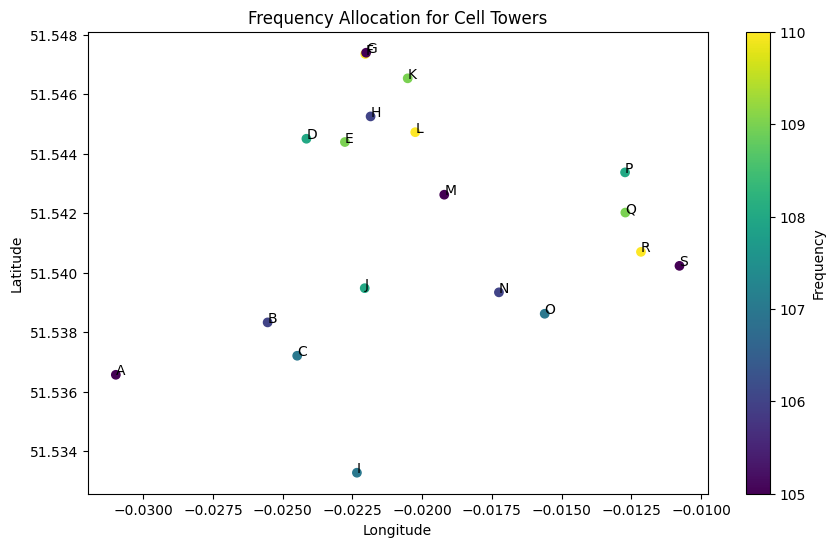

In [46]:
# Create a scatter plot of the cell towers, colored by frequency
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Long'], data['Lat'], c=data['Frequency'], cmap='viridis')
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Frequency Allocation for Cell Towers')

# Add labels to the points
for i, cell_id in enumerate(data['Cell ID']):
    plt.annotate(cell_id, (data['Long'][i], data['Lat'][i]))

plt.show()

This works efficiently on a 1D plane but on a 2D plane it become grosely incorrect.

This is evident with nodes 'C' and 'I'.

Since applying a 1D solution doesnt work, next is to try and first bruteforce the problem and solve as-is